# **Algoritmos para Modelos Predictivos - Trabajo Final**
$$\text{Docente :   }_{\text{Tito Reategui}}$$


$$\text{Mayo :   }_{\text{2022}}$$

![alt text](https://github.com/rosalbat/CTICBIGBATA17/blob/main/logo.JPG?raw=true)

# **Programa Big Data and Analytics**

##### *Trabajo Elaborado by*

#### `Ramirez Aburto, Dylan Jean Paul`
#### `Tiquillahuanca Tineo, Rosalba`
#### `Gomez Reinoso, Jean Dante`

![alt text](https://github.com/rosalbat/CTICBIGBATA17/blob/main/logou.png?raw=true)

###TEMA: `PREDICCIÓN DE NÚMERO DE MATRICULADOS PARA SIGUIENTE EL PERIODO ACADÉMICO 2022-2`

#INTRODUCCIÓN


Este proyecto tiene como objetivo principal determinar el mejor modelo para poder calcular la cantidad de matriculados para el siguiente periodo académico, de tal manera, que se pueda cubrir las vacantes con exactitud para elaborar los horarios.

#MARCO DE ANÁLISIS


####**Objetivos del Negocio**

Calcular el número de estudiantes a matricularse en el siguiente periodo académico

####**Objetivos de los Modelos Analíticos**

Construir una herramienta analítica que permita predecir la cantidad de estudiantes a matricularse en el siguiente periodo académico


####**Metodología de trabajo**

En este proyecto vamos a trabajar de la siguiente manera:


| **CONOCIMIENTO DEL PROBLEMA**     | **CONOCIMIENTO DE LA INFORMACIÓN** | **PREPARACIÓN DE LA INFORMACIÓN** | **MODELAMIENTO** |  TOMANDO ACCIONES |
|:-------:   | :--------: | :---: | :---: | :---: |
| Alcance del problema | Recursos | Construir matriz |Técnicas de modelado|Evaluación de los resultados|
| Hipotesis iniciales | Lista de variables | Exploracion de datos|Evaluación de modelos| Lista de posibles acciones|
| Recopilación de datos sobre el problema  | Descripción de variables | Transformación de variables | Evaluación de hipótesis inicial|Seguimiento de impactos|
| Estimación de esfuerzos | Calidad de datos / Restricciones  |  | |Compartiendo lo aprendido|

![alt text](https://github.com/rosalbat/CTICBIGBATA17/blob/main/predict.PNG?raw=true)


#Descripción del conjunto de datos (variables)


Con una matriz de 2528 registros.
De las 9 variables tenemos 8 variables independientes y 1 variable dependiente o variable objetivo
(Variable cuantitativa discreta)

| VARIABLES | DESCRIPCCIÓN |Tipo de Variable |
| :---: | :---: | :---: |
| ID CURSO | Identificador único del curso  | Independiente |
| TIPO CURSO | Código de tipo de curso(Obligatorio, Complementario, Electivo) | Independiente |
| PERIODO | Periodo de estudio del estudiante| Independiente |
| CODFAC | Facultad de estudio del estudiante | Independiente |
| **ESPECIALIDAD** | *Código de la especialidad* | Independiente |
| APROBADOS | Cantidad de aprobados en un curso| Independiente |
| **DESAPROBADOS** | *Cantidad de desaprobados en un curso* | Independiente |
| RETIRADOS | Cantidad de retirados en un curso | Independiente |
| **MATRICULADOS** | Cantidad de matriculados por curso | Dependiente |



Identificamos que los estudiantes

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df2=pd.read_csv('MATRICULADOS.csv', header=0, delimiter=';' )
print(df2)

      PERIODO FACULTAD  ESPECIALIDAD  CURSO TIPOCURSO  APROBADOS  \
0       20151        I             1  CB101         O         42   
1       20151        I             1  CB111         O         28   
2       20151        I             1  CB112         O         29   
3       20151        I             1  CB121         O         50   
4       20151        I             1  CB131         O         28   
...       ...      ...           ...    ...       ...        ...   
2523    20212        I             2  ST414         O          6   
2524    20212        I             2  ST605         E          4   
2525    20212        I             2  TE101         C          1   
2526    20212        I             2  TE111         E         29   
2527    20212        I             2  TP313         E          6   

      DESAPROBADOS  RETIRADOS  MATRICULADOS  
0               30          1            73  
1               13          1            42  
2               10          0            39  

In [ ]:
del(df2['FACULTAD'])

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df2.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(15)

,variable_1,variable_2,r,abs_r
32,MATRICULADOS,APROBADOS,0.933670,0.933670
17,APROBADOS,MATRICULADOS,0.933670,0.933670
33,MATRICULADOS,DESAPROBADOS,0.606809,0.606809
23,DESAPROBADOS,MATRICULADOS,0.606809,0.606809
15,APROBADOS,DESAPROBADOS,0.302626,0.302626
20,DESAPROBADOS,APROBADOS,0.302626,0.302626
18,DESAPROBADOS,PERIODO,-0.197342,0.197342
3,PERIODO,DESAPROBADOS,-0.197342,0.197342
29,RETIRADOS,MATRICULADOS,0.162460,0.162460
34,MATRICULADOS,RETIRADOS,0.162460,0.162460


In [ ]:
print(corr_matrix)

               PERIODO  ESPECIALIDAD  APROBADOS  DESAPROBADOS  RETIRADOS  \
PERIODO       1.000000      0.006989  -0.020997     -0.197342   0.025525   
ESPECIALIDAD  0.006989      1.000000  -0.139272      0.109620   0.024795   
APROBADOS    -0.020997     -0.139272   1.000000      0.302626  -0.000267   
DESAPROBADOS -0.197342      0.109620   0.302626      1.000000   0.146016   
RETIRADOS     0.025525      0.024795  -0.000267      0.146016   1.000000   
MATRICULADOS -0.081410     -0.075821   0.933670      0.606809   0.162460   

              MATRICULADOS  
PERIODO          -0.081410  
ESPECIALIDAD     -0.075821  
APROBADOS         0.933670  
DESAPROBADOS      0.606809  
RETIRADOS         0.162460  
MATRICULADOS      1.000000  


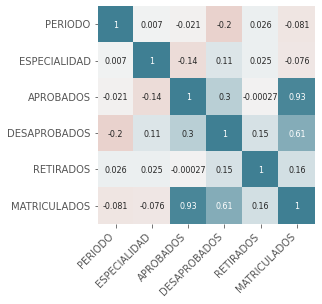

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

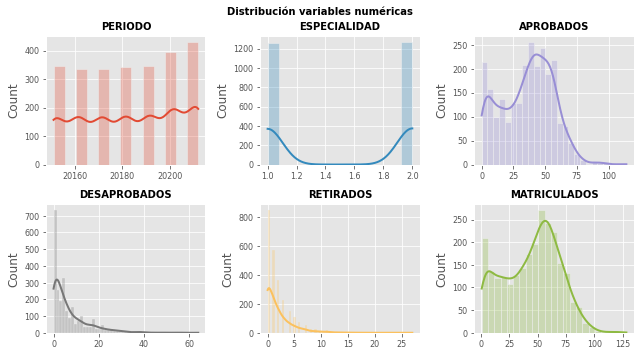

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df2.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df2,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]    
        )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = df2[['APROBADOS','DESAPROBADOS','RETIRADOS']]
y = df2['MATRICULADOS']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1's para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.608e+30
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        21:02:37   Log-Likelihood:                 55460.
No. Observations:                2022   AIC:                        -1.109e+05
Df Residuals:                    2018   BIC:                        -1.109e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.991e-13   1.43e-14    -20.879   

In [ ]:
# Intervalos de confianza de los coeficientes
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-3.272104e-13,-2.710193e-13
APROBADOS,1.000000e+00,1.000000e+00
DESAPROBADOS,1.000000e+00,1.000000e+00
RETIRADOS,1.000000e+00,1.000000e+00


In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

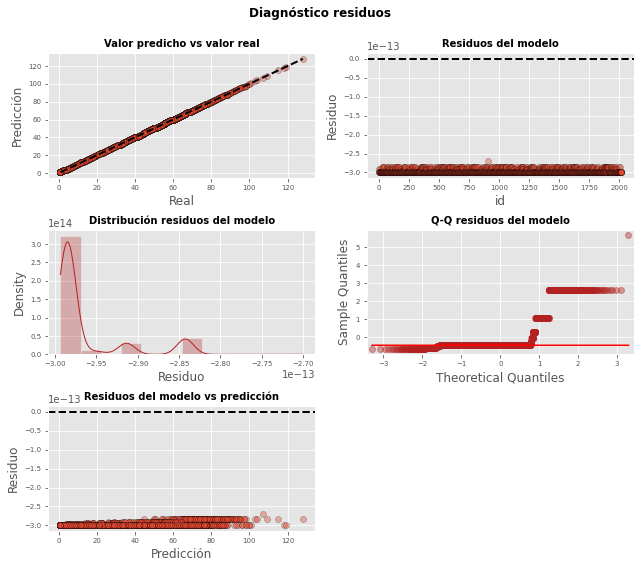

In [ ]:
# Inspección visual
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.5296808481216431, 0.0)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 725.9289646049299, p-value = 2.325563535649328e-158


In [ ]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
1010,42.0,7.258223e-15,42.0,42.0,42.0,42.0
268,57.0,1.317710e-14,57.0,57.0,57.0,57.0
1940,56.0,1.097190e-14,56.0,56.0,56.0,56.0
117,22.0,1.450940e-14,22.0,22.0,22.0,22.0


In [ ]:
# Error de test
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 2.9622817447890423e-13


In [ ]:
aprobados = 11250
desaprobados = 113
retirados = 16
matriculados_p = -2.991 + 1*aprobados - 1*desaprobados - 1*retirados
matriculados_p

11118.009

#Conclusiones


Según el valor de R-squared a 100% indica que el modelo explica toda de la varianza en la variable de resultado. Ademas, el p-value del modelo es significativo (4.608e+30) por lo que se puede aceptar el modelo, los coeficientes parciales de regresión son equivalentes a 0.

#Bibliografía




+ [GitHub](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
+[Colaboratory](https://colab.research.google.com/?utm_source=scs-index)